# Carga de librerias 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de documentos 

In [10]:
train_data = pd.read_csv('../data/processed/train_processed.csv')
test_data = pd.read_csv('../data/processed/test_processed.csv')

In [12]:
print(train_data.info())
print(train_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

# Tratamiento de Valores Faltantes

In [26]:
import numpy as np

# Llenar valores faltantes en 'Age' con la mediana
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Opción de extraer la primera letra de 'Cabin' o simplemente llenar con 'U' de Unknown
train_data['Cabin'] = train_data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')

# Llenar valores faltantes en 'Embarked' con el valor más común
most_common_port = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_port, inplace=True)


# Transformación de Variables Categóricas

In [30]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])


# Nuevas Características

In [33]:
# Crear una nueva característica de tamaño de familia
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Extraer título del nombre
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Visualizaciones

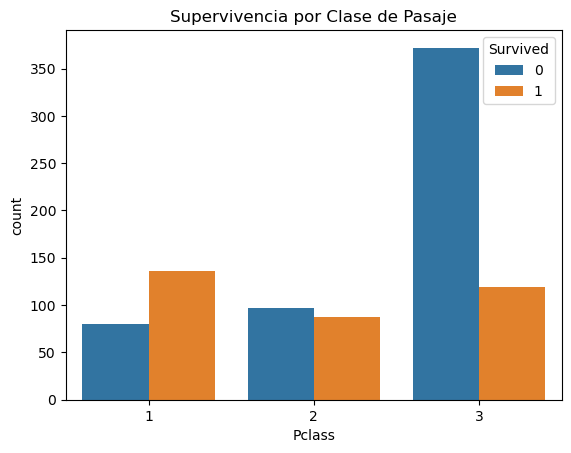

In [38]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Supervivencia por Clase de Pasaje')
plt.show()

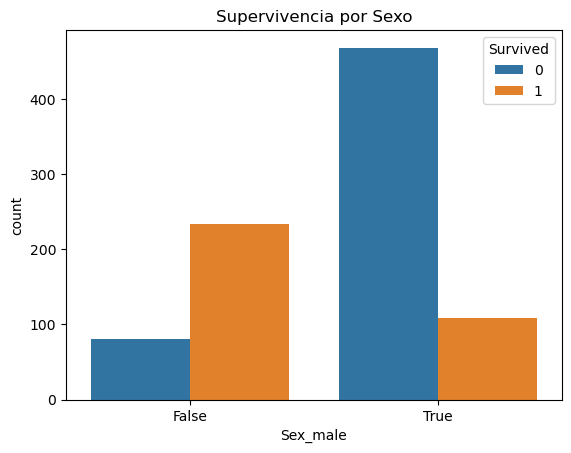

In [40]:
sns.countplot(x='Sex_male', hue='Survived', data=train_data)
plt.title('Supervivencia por Sexo')
plt.show()

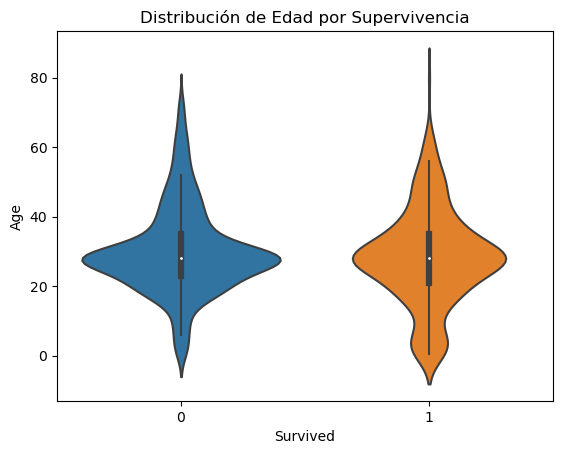

In [42]:
sns.violinplot(x='Survived', y='Age', data=train_data)
plt.title('Distribución de Edad por Supervivencia')
plt.show()

# Guardar Datos

In [46]:
train_data.to_csv('../data/processed/train_processed.csv', index=False)
